# Titanic: Machine Learning from Disaster
### Importing required Libraries & Dataset

In [1]:
import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns , warnings
%matplotlib inline

warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Abhi\Desktop\ML PROJECTS HOME\titanic_train.csv')
df_test1 = pd.read_csv(r'C:\Users\Abhi\Desktop\ML PROJECTS HOME\titanic_test.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Getting Deeper into Data

In [2]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exploratory Data Analysis ( EDA )

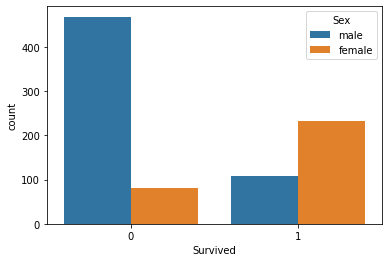

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df)

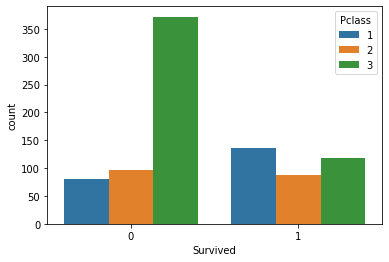

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df)

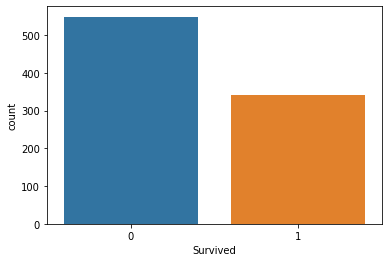

In [10]:
sns.countplot(df.Survived)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

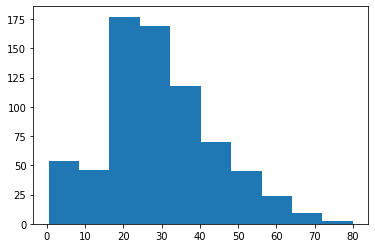

In [11]:
plt.hist(df.Age)

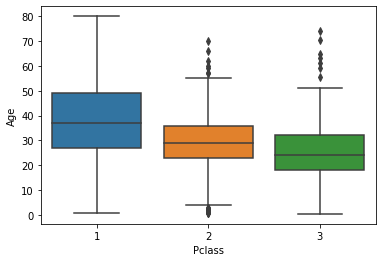

In [12]:
sns.boxplot(x='Pclass',y='Age',data=df)

### Dealing with Missing Values ( i.e Null Values )

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age
    
df.Age=df[['Age','Pclass']].apply(impute_age,axis=1)


In [15]:
df = df.drop(columns = ['Ticket','Name','Embarked','PassengerId','Cabin'])

dfn=df._get_numeric_data()
nc=list(dfn)
dfc=df.drop(columns=nc)
cc=list(dfc)

dfc=pd.get_dummies(dfc,drop_first=True)

data=pd.concat([dfn,dfc],axis=1)
data.shape

(891, 7)

In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_male    0
dtype: int64

## Feature Engineering & Feature Selection

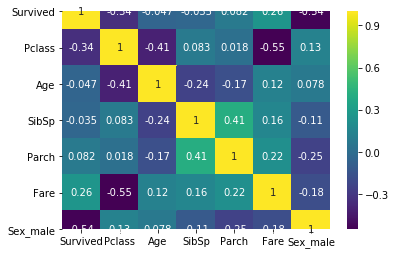

In [18]:
sns.heatmap(data.corr(),cmap='viridis',annot = True)

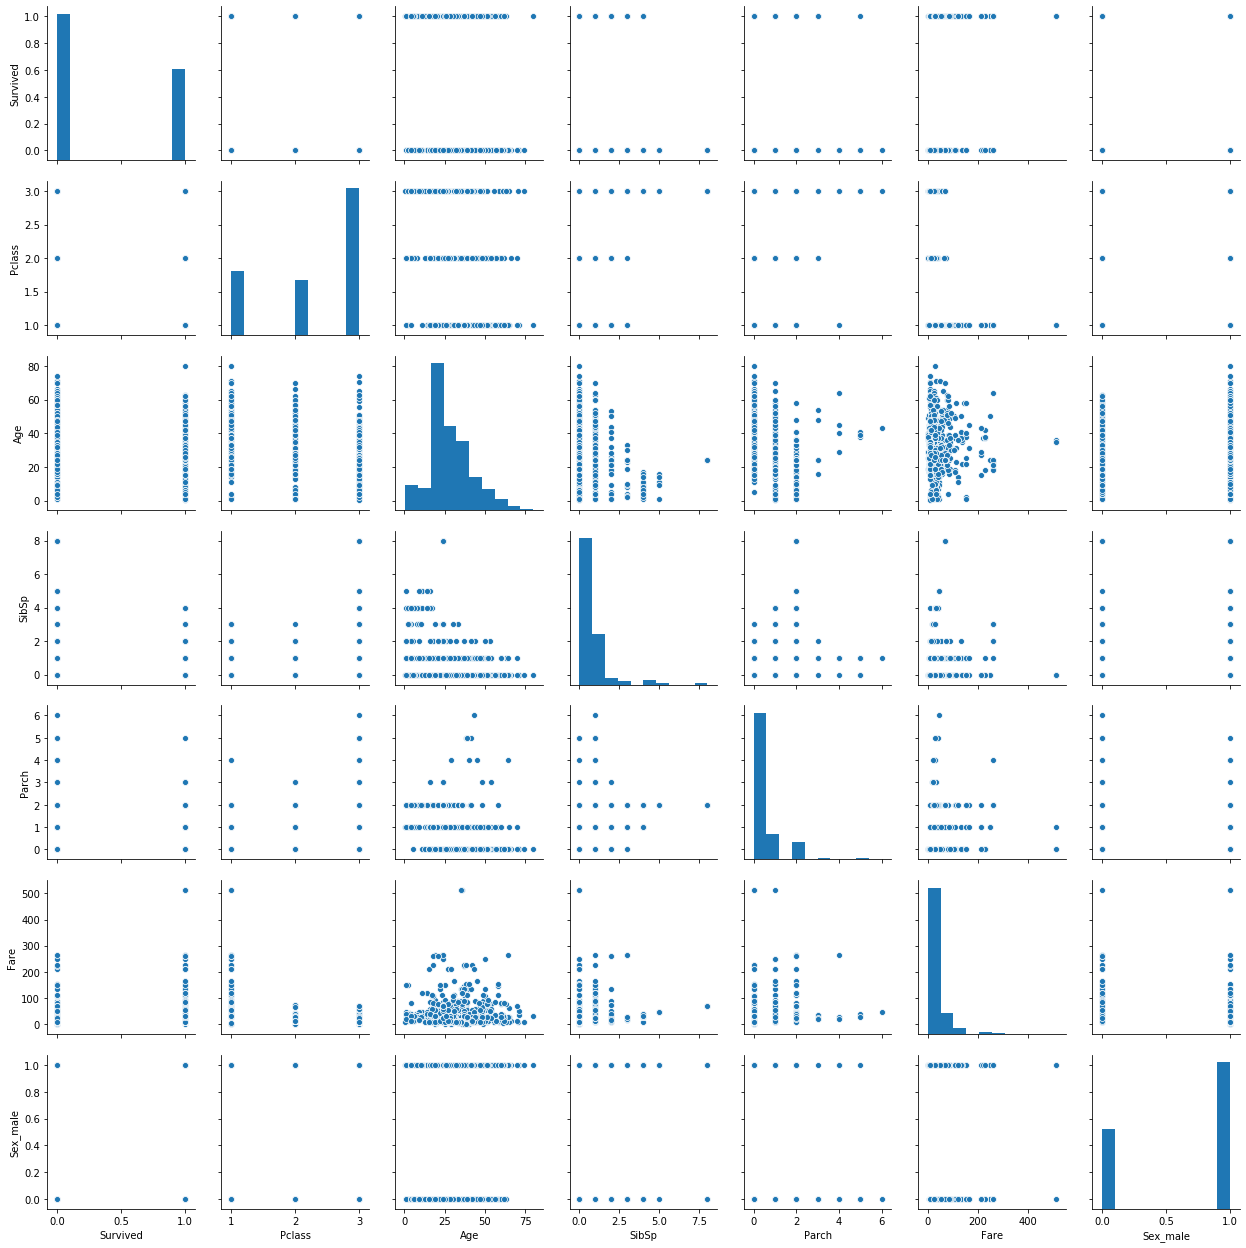

In [19]:
sns.pairplot(data)

In [20]:
c= data.corr()    # Finding correlation

i = 0

# replacing diogonal corr() which is 1 to NaN for finding
#i.e manulating and get the informative features.

while True:    
    try:
        c.iloc[i,i] = np.nan
        i += 1
    except:
        break

In [21]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
# Getting high corr. values w.r.t output because it supports the output...

features = c[(c['Survived'] > 0.1) | (c['Survived'] < -0.1)].dropna(how = 'all')['Survived']     
features_col = list(features.index)
print(features.shape, len(features_col) , features_col)     # Exactly what i want....

(3,) 3 ['Pclass', 'Fare', 'Sex_male']


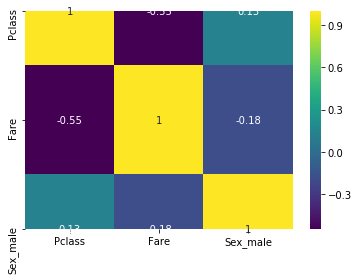

In [23]:
sns.heatmap(data[features_col].corr(),cmap='viridis',annot = True)

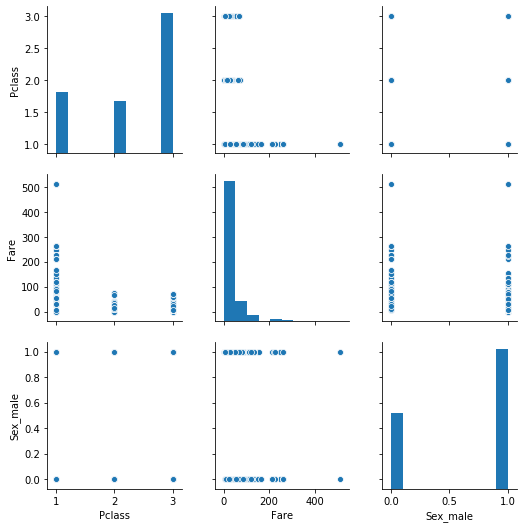

In [24]:
sns.pairplot(data[features_col])

# Comparing Models

In [25]:
# Preparing  pipeline for all the models
# Here DecisionTreeClassifier wins the race...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report


X = data[features_col]
y = data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)



models = [LogisticRegression(penalty='l2'),DecisionTreeClassifier()
          ,RandomForestClassifier(),KNeighborsClassifier(),SVC()]

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test,y_pred),type(model).__name__)

0.7892376681614349 LogisticRegression
0.8475336322869955 DecisionTreeClassifier
0.8385650224215246 RandomForestClassifier
0.8340807174887892 KNeighborsClassifier
0.820627802690583 SVC


## Here DecisionTreeClassifier Clearly Wins the Race

# Building Final Model

In [26]:
X = data[features_col]
y = data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

model = DecisionTreeClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred),type(model).__name__)

0.8475336322869955 DecisionTreeClassifier


In [27]:
print(confusion_matrix(y_test,y_pred)) 

[[125   3]
 [ 31  64]]


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       128
           1       0.96      0.67      0.79        95

    accuracy                           0.85       223
   macro avg       0.88      0.83      0.84       223
weighted avg       0.87      0.85      0.84       223



# Getting Predictions Ready For Kaggle Competition

In [29]:
X.columns

Index(['Pclass', 'Fare', 'Sex_male'], dtype='object')

In [30]:
df_test = df_test1[['Pclass', 'Fare', 'Sex']]
df_test.isnull().sum()

Pclass    0
Fare      1
Sex       0
dtype: int64

In [31]:
df_test[df_test['Fare'] != df_test['Fare']]

,Pclass,Fare,Sex
152,3,NaN,male


In [32]:
df_test[df_test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [33]:
df_test = df_test.fillna(12.46)

In [34]:
df_test.isnull().sum()

Pclass    0
Fare      0
Sex       0
dtype: int64

In [35]:
df_test = pd.get_dummies(df_test,drop_first = True)

# Final Model

In [36]:
X_train = data[['Pclass', 'Fare', 'Sex_male']]
X_test = df_test
y_train = data.Survived

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [37]:
predictions = pd.concat([df_test1[['PassengerId']],pd.DataFrame(y_pred,columns = ['Survived'])],axis=1)

In [38]:
predictions.shape

(418, 2)

In [39]:
predictions

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# ...END...